In [ ]:
# Healthcare Data Analysis - Diabetes Dataset

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load the dataset
df = pd.read_csv('diabetes.csv')
print("First 5 rows of data:")
print(df.head())

First 5 rows of data:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [3]:
# Step 3: Basic info
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nStatistical Summary:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunctio

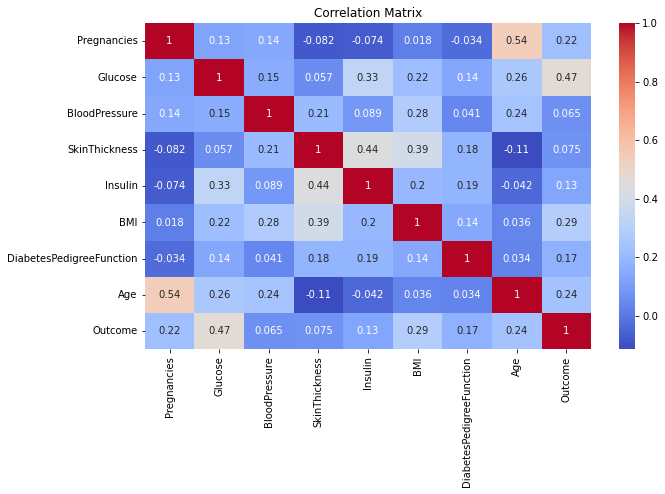

In [4]:
# Step 4: Correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

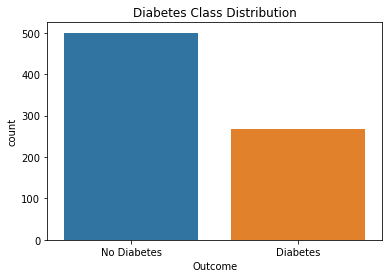

In [5]:
# Step 5: Check class distribution (Outcome = 0 or 1)
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Class Distribution")
plt.xticks([0,1], ['No Diabetes', 'Diabetes'])
plt.show()

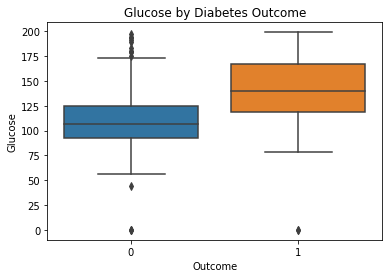

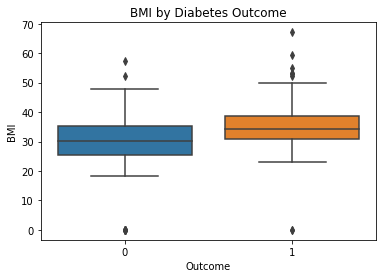

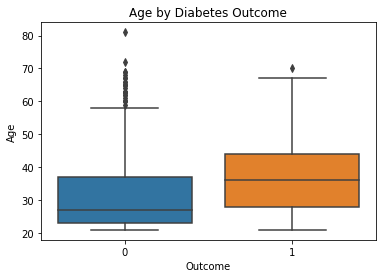

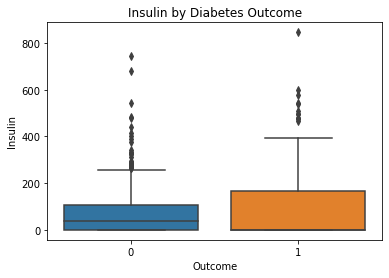

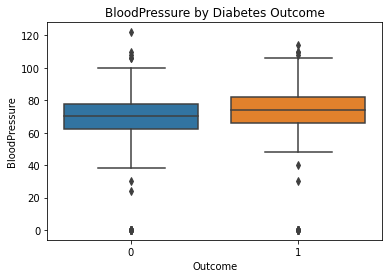

In [6]:
# Step 6: Explore features by Outcome
features = ['Glucose', 'BMI', 'Age', 'Insulin', 'BloodPressure']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f"{feature} by Diabetes Outcome")
    plt.show()


Diabetes Rate by Age Group:
AgeGroup
[20, 30)    0.212121
[30, 40)    0.460606
[40, 50)    0.550847
[50, 60)    0.596491
[60, 70)    0.275862
[70, 80)    0.500000
Name: Outcome, dtype: float64


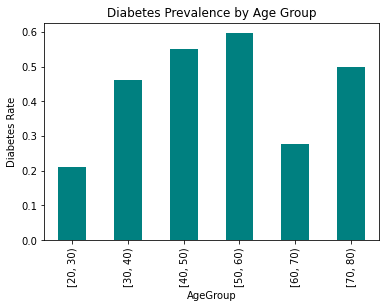

In [7]:
# Step 7: Group analysis
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], right=False)
grouped = df.groupby('AgeGroup')['Outcome'].mean()
print("\nDiabetes Rate by Age Group:")
print(grouped)

grouped.plot(kind='bar', color='teal')
plt.title("Diabetes Prevalence by Age Group")
plt.ylabel("Diabetes Rate")
plt.show()

In [8]:
# Step 8 (Optional): Predictive Modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [9]:
# Features and target
X = df.drop(['Outcome', 'AgeGroup'], axis=1)
y = df['Outcome']

In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Predictions
y_pred = clf.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


Confusion Matrix:
[[77 22]
 [21 34]]

Accuracy Score: 0.7207792207792207


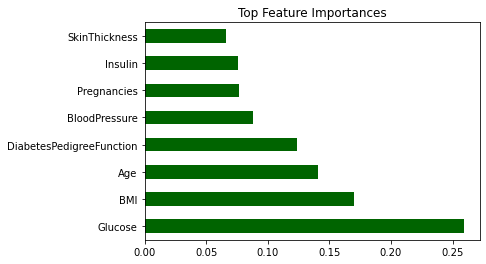

In [12]:
# Step 9: Feature importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh', color='darkgreen')
plt.title("Top Feature Importances")
plt.show()